# I.2 Quantum circuit
**Codercise I.2.1.**
The code below is a quantum function with all the gates from the above circuit (which we reproduce here for convenience). However, the gates are out of order! Re-arrange the lines of the function to match the order of operations in the circuit.

In [1]:
import numpy as np
import pennylane as qml

In [2]:
def my_circuit(theta, phi):
    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])

While quantum circuits are represented as quantum functions, a quantum function alone isn't enough to run and execute a circuit.For this we nee two extra parts:
* a device to run the circuit on
* a QNode, which binds the circuit to the device, and executes it.

In this tutorial we use quantum simulators (our device),but Pennylane provides plugins that enable us to run on real quantum hardware as well! To construct a device in Pennylane, we need to know the name or type of the device, and the number of qubits (wires) it has:
[qml.device documentation](https://docs.pennylane.ai/en/stable/code/api/pennylane.device.html)

In [4]:
num_qubits = 3
dev = qml.device('default.qubit', wires = num_qubits)

Once we have a device, we can construct a **QNode**. QNodes are the main unit of quantum computation in PennyLane
![QNode](https://uploads-ssl.webflow.com/5f44b6c70fbca212a2676405/60500126f402ab0b89bcbba9_Untitled.png)

We have to ways to contruct a QNode:
* from device
* quantum function

`my_qnode = qml.QNode(my_circuit, my_device)`

**Codercise I.2.2.**
Complete the quantum function in the PennyLane code below to implement the following quantum circuit. We'll then construct a QNode, and run the circuit on the provided device.
![QNode](./images/I.2.2.png)

C:\Users\marty\AppData\Local\Temp\ipykernel_8520\4103172742.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


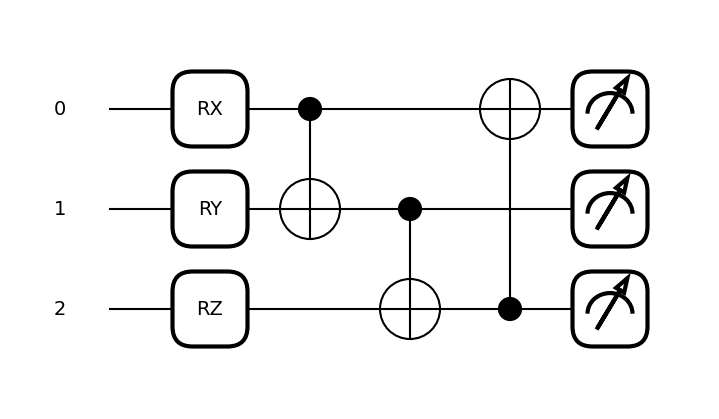

In [7]:
from IPython.core.display_functions import display
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)

    qml.broadcast(qml.CNOT, wires=range(3), pattern='ring')

    return qml.probs(wires=range(3))


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

# Now we can execute the QNode by calling it like we would a regular function
my_qnode(theta, phi, omega)
fig, ax = qml.draw_mpl(my_circuit)(theta, phi, omega)
fig.show()

**Codercise I.2.3.**
 The quantum function below implements the circuit from the previous exercise. Apply a decorator to the quantum function to construct a QNode, then run it using the provided input parameters.
 [qml.qnode documenation](https://docs.pennylane.ai/en/stable/code/api/pennylane.qnode.html)

In [6]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3

# RUN THE QNODE WITH THE PROVIDED PARAMETERS
my_circuit(theta, phi, omega)

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

**Codercise I.2.4**
What is the depth of the circuit in the picture below?
![QNode](./images/I.2.2.png)

In [7]:
dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


# FILL IN THE CORRECT CIRCUIT DEPTH
depth = 4